In [1]:
import os
import sys
import numpy as np
os.environ['KERAS_BACKEND'] = "tensorflow"
import keras as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, CuDNNGRU, LSTM
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Force one-gpu
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

print("OS: ", sys.platform)
print("Python: ", sys.version)
print("Keras: ", K.__version__)
print("Numpy: ", np.__version__)
print("Tensorflow: ", tf.__version__)
print(K.backend.backend())


OS:  linux
Python:  3.5.5 |Anaconda custom (64-bit)| (default, May 13 2018, 21:12:35) 
[GCC 7.2.0]
Keras:  2.2.4
Numpy:  1.15.0
Tensorflow:  1.13.1
tensorflow


In [3]:
# generate fake regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.19, random_state=1)
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(1000,1))
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(1000,1))

In [4]:
y.dtype

dtype('float64')

In [5]:
X.shape

(1000, 5)

In [6]:
# define and Arch 
model = Sequential()
model.add(Dense(4, input_dim=5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear')) # Last layer is linear here 
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fit the model
history = model.fit(X, y, epochs=1000, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 0s 426us/step - loss: 0.2128 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2128 - val_loss: 0.1939 - val_mean_squared_error: 0.0604 - val_mean_absolute_error: 0.1939
Epoch 2/1000
800/800 [==============================] - 0s 62us/step - loss: 0.1948 - mean_squared_error: 0.0582 - mean_absolute_error: 0.1948 - val_loss: 0.1827 - val_mean_squared_error: 0.0536 - val_mean_absolute_error: 0.1827
Epoch 3/1000
800/800 [==============================] - 0s 66us/step - loss: 0.1836 - mean_squared_error: 0.0515 - mean_absolute_error: 0.1836 - val_loss: 0.1726 - val_mean_squared_error: 0.0479 - val_mean_absolute_error: 0.1726
Epoch 4/1000
800/800 [==============================] - 0s 60us/step - loss: 0.1732 - mean_squared_error: 0.0457 - mean_absolute_error: 0.1732 - val_loss: 0.1630 - val_mean_squared_error: 0.0429 - val_mean_absolute_err

800/800 [==============================] - 0s 65us/step - loss: 0.0324 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0324 - val_loss: 0.0290 - val_mean_squared_error: 0.0013 - val_mean_absolute_error: 0.0290
Epoch 36/1000
800/800 [==============================] - 0s 61us/step - loss: 0.0280 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0280 - val_loss: 0.0246 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0246
Epoch 37/1000
800/800 [==============================] - ETA: 0s - loss: 0.0249 - mean_squared_error: 9.6355e-04 - mean_absolute_error: 0.02 - 0s 57us/step - loss: 0.0238 - mean_squared_error: 9.2485e-04 - mean_absolute_error: 0.0238 - val_loss: 0.0204 - val_mean_squared_error: 6.8170e-04 - val_mean_absolute_error: 0.0204
Epoch 38/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0195 - mean_squared_error: 6.6129e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0163 - val_mean_squared_error: 4.4168e-04 - val_mean_absolute_error:

800/800 [==============================] - 0s 61us/step - loss: 0.0018 - mean_squared_error: 3.5842e-05 - mean_absolute_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 3.7007e-05 - val_mean_absolute_error: 0.0014
Epoch 70/1000
800/800 [==============================] - 0s 64us/step - loss: 0.0013 - mean_squared_error: 3.3591e-05 - mean_absolute_error: 0.0013 - val_loss: 9.6574e-04 - val_mean_squared_error: 3.5876e-05 - val_mean_absolute_error: 9.6574e-04
Epoch 71/1000
800/800 [==============================] - 0s 62us/step - loss: 9.0274e-04 - mean_squared_error: 3.2398e-05 - mean_absolute_error: 9.0274e-04 - val_loss: 0.0013 - val_mean_squared_error: 3.4250e-05 - val_mean_absolute_error: 0.0013
Epoch 72/1000
800/800 [==============================] - 0s 59us/step - loss: 9.7869e-04 - mean_squared_error: 3.1525e-05 - mean_absolute_error: 9.7869e-04 - val_loss: 9.1934e-04 - val_mean_squared_error: 3.2936e-05 - val_mean_absolute_error: 9.1934e-04
Epoch 73/1000
800/800 [=======

800/800 [==============================] - 0s 58us/step - loss: 8.5990e-04 - mean_squared_error: 1.8095e-05 - mean_absolute_error: 8.5990e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.7193e-05 - val_mean_absolute_error: 0.0011
Epoch 103/1000
800/800 [==============================] - 0s 60us/step - loss: 9.6065e-04 - mean_squared_error: 1.8140e-05 - mean_absolute_error: 9.6065e-04 - val_loss: 7.5253e-04 - val_mean_squared_error: 1.6085e-05 - val_mean_absolute_error: 7.5253e-04
Epoch 104/1000
800/800 [==============================] - 0s 63us/step - loss: 0.0011 - mean_squared_error: 1.7686e-05 - mean_absolute_error: 0.0011 - val_loss: 7.6994e-04 - val_mean_squared_error: 1.6352e-05 - val_mean_absolute_error: 7.6994e-04
Epoch 105/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0011 - mean_squared_error: 1.7983e-05 - mean_absolute_error: 0.0011 - val_loss: 8.6159e-04 - val_mean_squared_error: 1.5932e-05 - val_mean_absolute_error: 8.6159e-04
Epoch 106/1000
800/

Epoch 135/1000
800/800 [==============================] - 0s 61us/step - loss: 9.8842e-04 - mean_squared_error: 1.4475e-05 - mean_absolute_error: 9.8842e-04 - val_loss: 8.7469e-04 - val_mean_squared_error: 1.1569e-05 - val_mean_absolute_error: 8.7469e-04
Epoch 136/1000
800/800 [==============================] - 0s 66us/step - loss: 5.8841e-04 - mean_squared_error: 1.4186e-05 - mean_absolute_error: 5.8841e-04 - val_loss: 5.7969e-04 - val_mean_squared_error: 1.1024e-05 - val_mean_absolute_error: 5.7969e-04
Epoch 137/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0012 - mean_squared_error: 1.5236e-05 - mean_absolute_error: 0.0012 - val_loss: 0.0018 - val_mean_squared_error: 1.2347e-05 - val_mean_absolute_error: 0.0018
Epoch 138/1000
800/800 [==============================] - 0s 70us/step - loss: 9.8015e-04 - mean_squared_error: 1.5035e-05 - mean_absolute_error: 9.8015e-04 - val_loss: 8.7318e-04 - val_mean_squared_error: 1.1301e-05 - val_mean_absolute_error: 8.7318e

800/800 [==============================] - 0s 75us/step - loss: 8.4321e-04 - mean_squared_error: 1.2694e-05 - mean_absolute_error: 8.4321e-04 - val_loss: 8.4017e-04 - val_mean_squared_error: 7.0426e-06 - val_mean_absolute_error: 8.4017e-04
Epoch 168/1000
800/800 [==============================] - 0s 65us/step - loss: 0.0011 - mean_squared_error: 1.2913e-05 - mean_absolute_error: 0.0011 - val_loss: 5.1884e-04 - val_mean_squared_error: 6.4876e-06 - val_mean_absolute_error: 5.1884e-04
Epoch 169/1000
800/800 [==============================] - 0s 64us/step - loss: 5.8192e-04 - mean_squared_error: 1.1665e-05 - mean_absolute_error: 5.8192e-04 - val_loss: 5.7674e-04 - val_mean_squared_error: 6.2852e-06 - val_mean_absolute_error: 5.7674e-04
Epoch 170/1000
800/800 [==============================] - 0s 64us/step - loss: 5.8582e-04 - mean_squared_error: 1.1820e-05 - mean_absolute_error: 5.8582e-04 - val_loss: 8.9745e-04 - val_mean_squared_error: 6.8724e-06 - val_mean_absolute_error: 8.9745e-04
Epo

800/800 [==============================] - 0s 65us/step - loss: 6.5574e-04 - mean_squared_error: 8.9460e-06 - mean_absolute_error: 6.5574e-04 - val_loss: 5.7286e-04 - val_mean_squared_error: 8.0067e-06 - val_mean_absolute_error: 5.7286e-04
Epoch 200/1000
800/800 [==============================] - 0s 60us/step - loss: 6.9116e-04 - mean_squared_error: 9.1603e-06 - mean_absolute_error: 6.9116e-04 - val_loss: 6.6170e-04 - val_mean_squared_error: 8.5811e-06 - val_mean_absolute_error: 6.6170e-04
Epoch 201/1000
800/800 [==============================] - 0s 61us/step - loss: 6.0289e-04 - mean_squared_error: 9.0837e-06 - mean_absolute_error: 6.0289e-04 - val_loss: 8.6837e-04 - val_mean_squared_error: 8.1141e-06 - val_mean_absolute_error: 8.6837e-04
Epoch 202/1000
800/800 [==============================] - 0s 67us/step - loss: 6.4302e-04 - mean_squared_error: 9.0740e-06 - mean_absolute_error: 6.4302e-04 - val_loss: 6.9488e-04 - val_mean_squared_error: 6.8992e-06 - val_mean_absolute_error: 6.9488

Epoch 231/1000
800/800 [==============================] - 0s 59us/step - loss: 4.3957e-04 - mean_squared_error: 8.3406e-06 - mean_absolute_error: 4.3957e-04 - val_loss: 5.4548e-04 - val_mean_squared_error: 1.0740e-05 - val_mean_absolute_error: 5.4548e-04
Epoch 232/1000
800/800 [==============================] - 0s 63us/step - loss: 4.1780e-04 - mean_squared_error: 7.9643e-06 - mean_absolute_error: 4.1780e-04 - val_loss: 6.0934e-04 - val_mean_squared_error: 1.0324e-05 - val_mean_absolute_error: 6.0934e-04
Epoch 233/1000
800/800 [==============================] - 0s 64us/step - loss: 5.5219e-04 - mean_squared_error: 8.1460e-06 - mean_absolute_error: 5.5219e-04 - val_loss: 5.6599e-04 - val_mean_squared_error: 9.6367e-06 - val_mean_absolute_error: 5.6599e-04
Epoch 234/1000
800/800 [==============================] - 0s 58us/step - loss: 5.8527e-04 - mean_squared_error: 8.8467e-06 - mean_absolute_error: 5.8527e-04 - val_loss: 8.6730e-04 - val_mean_squared_error: 1.0370e-05 - val_mean_absolut

800/800 [==============================] - 0s 59us/step - loss: 4.2737e-04 - mean_squared_error: 6.6715e-06 - mean_absolute_error: 4.2737e-04 - val_loss: 5.3137e-04 - val_mean_squared_error: 8.8116e-06 - val_mean_absolute_error: 5.3137e-04
Epoch 264/1000
800/800 [==============================] - 0s 61us/step - loss: 4.2687e-04 - mean_squared_error: 6.6183e-06 - mean_absolute_error: 4.2687e-04 - val_loss: 8.3027e-04 - val_mean_squared_error: 8.8509e-06 - val_mean_absolute_error: 8.3027e-04
Epoch 265/1000
800/800 [==============================] - 0s 62us/step - loss: 4.3679e-04 - mean_squared_error: 6.5189e-06 - mean_absolute_error: 4.3679e-04 - val_loss: 7.4347e-04 - val_mean_squared_error: 8.7067e-06 - val_mean_absolute_error: 7.4347e-04
Epoch 266/1000
800/800 [==============================] - 0s 61us/step - loss: 5.5401e-04 - mean_squared_error: 6.5294e-06 - mean_absolute_error: 5.5401e-04 - val_loss: 8.5132e-04 - val_mean_squared_error: 8.8671e-06 - val_mean_absolute_error: 8.5132

800/800 [==============================] - 0s 61us/step - loss: 4.3843e-04 - mean_squared_error: 6.5858e-06 - mean_absolute_error: 4.3843e-04 - val_loss: 5.7549e-04 - val_mean_squared_error: 8.4365e-06 - val_mean_absolute_error: 5.7549e-04
Epoch 296/1000
800/800 [==============================] - 0s 65us/step - loss: 6.2320e-04 - mean_squared_error: 7.4005e-06 - mean_absolute_error: 6.2320e-04 - val_loss: 6.3390e-04 - val_mean_squared_error: 8.9490e-06 - val_mean_absolute_error: 6.3390e-04
Epoch 297/1000
800/800 [==============================] - 0s 61us/step - loss: 6.6378e-04 - mean_squared_error: 7.3006e-06 - mean_absolute_error: 6.6378e-04 - val_loss: 0.0016 - val_mean_squared_error: 1.0223e-05 - val_mean_absolute_error: 0.0016
Epoch 298/1000
800/800 [==============================] - 0s 61us/step - loss: 8.2247e-04 - mean_squared_error: 7.8792e-06 - mean_absolute_error: 8.2247e-04 - val_loss: 8.0159e-04 - val_mean_squared_error: 9.0461e-06 - val_mean_absolute_error: 8.0159e-04
Epo

800/800 [==============================] - 0s 61us/step - loss: 7.0976e-04 - mean_squared_error: 6.8702e-06 - mean_absolute_error: 7.0976e-04 - val_loss: 6.3067e-04 - val_mean_squared_error: 7.8570e-06 - val_mean_absolute_error: 6.3067e-04
Epoch 328/1000
800/800 [==============================] - 0s 63us/step - loss: 5.5072e-04 - mean_squared_error: 6.2608e-06 - mean_absolute_error: 5.5072e-04 - val_loss: 5.3096e-04 - val_mean_squared_error: 7.0043e-06 - val_mean_absolute_error: 5.3096e-04
Epoch 329/1000
800/800 [==============================] - 0s 65us/step - loss: 5.6824e-04 - mean_squared_error: 6.2814e-06 - mean_absolute_error: 5.6824e-04 - val_loss: 7.1321e-04 - val_mean_squared_error: 8.5115e-06 - val_mean_absolute_error: 7.1321e-04
Epoch 330/1000
800/800 [==============================] - 0s 57us/step - loss: 6.0322e-04 - mean_squared_error: 6.8638e-06 - mean_absolute_error: 6.0322e-04 - val_loss: 7.5237e-04 - val_mean_squared_error: 8.4485e-06 - val_mean_absolute_error: 7.5237

800/800 [==============================] - 0s 67us/step - loss: 5.8747e-04 - mean_squared_error: 6.5564e-06 - mean_absolute_error: 5.8747e-04 - val_loss: 4.9594e-04 - val_mean_squared_error: 8.1450e-06 - val_mean_absolute_error: 4.9594e-04
Epoch 360/1000
800/800 [==============================] - 0s 68us/step - loss: 4.2302e-04 - mean_squared_error: 6.1985e-06 - mean_absolute_error: 4.2302e-04 - val_loss: 7.2257e-04 - val_mean_squared_error: 8.0997e-06 - val_mean_absolute_error: 7.2257e-04
Epoch 361/1000
800/800 [==============================] - 0s 65us/step - loss: 5.7624e-04 - mean_squared_error: 6.2807e-06 - mean_absolute_error: 5.7624e-04 - val_loss: 7.0944e-04 - val_mean_squared_error: 7.9466e-06 - val_mean_absolute_error: 7.0944e-04
Epoch 362/1000
800/800 [==============================] - 0s 67us/step - loss: 6.2668e-04 - mean_squared_error: 6.0743e-06 - mean_absolute_error: 6.2668e-04 - val_loss: 5.6858e-04 - val_mean_squared_error: 7.3225e-06 - val_mean_absolute_error: 5.6858

800/800 [==============================] - 0s 78us/step - loss: 4.8585e-04 - mean_squared_error: 6.4380e-06 - mean_absolute_error: 4.8585e-04 - val_loss: 5.2108e-04 - val_mean_squared_error: 8.6715e-06 - val_mean_absolute_error: 5.2108e-04
Epoch 392/1000
800/800 [==============================] - 0s 65us/step - loss: 6.4029e-04 - mean_squared_error: 6.5962e-06 - mean_absolute_error: 6.4029e-04 - val_loss: 9.0335e-04 - val_mean_squared_error: 9.6332e-06 - val_mean_absolute_error: 9.0335e-04
Epoch 393/1000
800/800 [==============================] - 0s 65us/step - loss: 8.5176e-04 - mean_squared_error: 7.2953e-06 - mean_absolute_error: 8.5176e-04 - val_loss: 6.4127e-04 - val_mean_squared_error: 9.0621e-06 - val_mean_absolute_error: 6.4127e-04
Epoch 394/1000
800/800 [==============================] - 0s 57us/step - loss: 5.7019e-04 - mean_squared_error: 6.6467e-06 - mean_absolute_error: 5.7019e-04 - val_loss: 5.5830e-04 - val_mean_squared_error: 9.0401e-06 - val_mean_absolute_error: 5.5830

800/800 [==============================] - 0s 67us/step - loss: 6.1263e-04 - mean_squared_error: 6.8415e-06 - mean_absolute_error: 6.1263e-04 - val_loss: 7.2988e-04 - val_mean_squared_error: 8.5879e-06 - val_mean_absolute_error: 7.2988e-04
Epoch 424/1000
800/800 [==============================] - 0s 58us/step - loss: 5.7009e-04 - mean_squared_error: 6.3923e-06 - mean_absolute_error: 5.7009e-04 - val_loss: 5.4816e-04 - val_mean_squared_error: 9.1489e-06 - val_mean_absolute_error: 5.4816e-04
Epoch 425/1000
800/800 [==============================] - 0s 60us/step - loss: 4.2229e-04 - mean_squared_error: 6.4084e-06 - mean_absolute_error: 4.2229e-04 - val_loss: 5.3411e-04 - val_mean_squared_error: 9.1289e-06 - val_mean_absolute_error: 5.3411e-04
Epoch 426/1000
800/800 [==============================] - 0s 60us/step - loss: 6.8576e-04 - mean_squared_error: 7.0254e-06 - mean_absolute_error: 6.8576e-04 - val_loss: 6.8715e-04 - val_mean_squared_error: 9.5671e-06 - val_mean_absolute_error: 6.8715

800/800 [==============================] - 0s 58us/step - loss: 6.2758e-04 - mean_squared_error: 6.8981e-06 - mean_absolute_error: 6.2758e-04 - val_loss: 6.9710e-04 - val_mean_squared_error: 9.4969e-06 - val_mean_absolute_error: 6.9710e-04
Epoch 456/1000
800/800 [==============================] - 0s 59us/step - loss: 7.9507e-04 - mean_squared_error: 6.9074e-06 - mean_absolute_error: 7.9507e-04 - val_loss: 0.0017 - val_mean_squared_error: 1.1814e-05 - val_mean_absolute_error: 0.0017
Epoch 457/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0012 - mean_squared_error: 8.0298e-06 - mean_absolute_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 1.0604e-05 - val_mean_absolute_error: 0.0013
Epoch 458/1000
800/800 [==============================] - 0s 63us/step - loss: 0.0011 - mean_squared_error: 7.1150e-06 - mean_absolute_error: 0.0011 - val_loss: 8.9876e-04 - val_mean_squared_error: 8.6255e-06 - val_mean_absolute_error: 8.9876e-04
Epoch 459/1000
800/800 [===

800/800 [==============================] - 0s 62us/step - loss: 5.0745e-04 - mean_squared_error: 6.2949e-06 - mean_absolute_error: 5.0745e-04 - val_loss: 5.2179e-04 - val_mean_squared_error: 9.7761e-06 - val_mean_absolute_error: 5.2179e-04
Epoch 488/1000
800/800 [==============================] - 0s 73us/step - loss: 3.9048e-04 - mean_squared_error: 6.1506e-06 - mean_absolute_error: 3.9048e-04 - val_loss: 5.4907e-04 - val_mean_squared_error: 9.6907e-06 - val_mean_absolute_error: 5.4907e-04
Epoch 489/1000
800/800 [==============================] - 0s 64us/step - loss: 6.4495e-04 - mean_squared_error: 6.4232e-06 - mean_absolute_error: 6.4495e-04 - val_loss: 5.2041e-04 - val_mean_squared_error: 9.4125e-06 - val_mean_absolute_error: 5.2041e-04
Epoch 490/1000
800/800 [==============================] - 0s 64us/step - loss: 6.1923e-04 - mean_squared_error: 6.5626e-06 - mean_absolute_error: 6.1923e-04 - val_loss: 6.0204e-04 - val_mean_squared_error: 9.8889e-06 - val_mean_absolute_error: 6.0204

800/800 [==============================] - 0s 61us/step - loss: 4.4831e-04 - mean_squared_error: 5.7753e-06 - mean_absolute_error: 4.4831e-04 - val_loss: 0.0010 - val_mean_squared_error: 1.0272e-05 - val_mean_absolute_error: 0.0010
Epoch 520/1000
800/800 [==============================] - 0s 61us/step - loss: 0.0010 - mean_squared_error: 7.0316e-06 - mean_absolute_error: 0.0010 - val_loss: 0.0013 - val_mean_squared_error: 1.0582e-05 - val_mean_absolute_error: 0.0013
Epoch 521/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0012 - mean_squared_error: 7.4261e-06 - mean_absolute_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 1.1371e-05 - val_mean_absolute_error: 0.0013
Epoch 522/1000
800/800 [==============================] - 0s 64us/step - loss: 0.0012 - mean_squared_error: 7.8260e-06 - mean_absolute_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 1.1654e-05 - val_mean_absolute_error: 0.0014
Epoch 523/1000
800/800 [===========================

Epoch 552/1000
800/800 [==============================] - 0s 62us/step - loss: 6.3625e-04 - mean_squared_error: 6.5658e-06 - mean_absolute_error: 6.3625e-04 - val_loss: 7.9297e-04 - val_mean_squared_error: 9.7193e-06 - val_mean_absolute_error: 7.9297e-04
Epoch 553/1000
800/800 [==============================] - 0s 61us/step - loss: 5.4775e-04 - mean_squared_error: 6.6119e-06 - mean_absolute_error: 5.4775e-04 - val_loss: 6.1600e-04 - val_mean_squared_error: 1.0121e-05 - val_mean_absolute_error: 6.1600e-04
Epoch 554/1000
800/800 [==============================] - 0s 61us/step - loss: 6.0234e-04 - mean_squared_error: 6.4552e-06 - mean_absolute_error: 6.0234e-04 - val_loss: 8.9275e-04 - val_mean_squared_error: 9.7046e-06 - val_mean_absolute_error: 8.9275e-04
Epoch 555/1000
800/800 [==============================] - 0s 60us/step - loss: 4.8026e-04 - mean_squared_error: 6.5017e-06 - mean_absolute_error: 4.8026e-04 - val_loss: 7.3382e-04 - val_mean_squared_error: 9.1496e-06 - val_mean_absolut

800/800 [==============================] - 0s 58us/step - loss: 5.8282e-04 - mean_squared_error: 6.3015e-06 - mean_absolute_error: 5.8282e-04 - val_loss: 7.4130e-04 - val_mean_squared_error: 1.0052e-05 - val_mean_absolute_error: 7.4130e-04
Epoch 585/1000
800/800 [==============================] - 0s 58us/step - loss: 6.5033e-04 - mean_squared_error: 6.3361e-06 - mean_absolute_error: 6.5033e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.0252e-05 - val_mean_absolute_error: 0.0011
Epoch 586/1000
800/800 [==============================] - 0s 60us/step - loss: 6.2333e-04 - mean_squared_error: 6.5953e-06 - mean_absolute_error: 6.2333e-04 - val_loss: 7.8242e-04 - val_mean_squared_error: 9.0635e-06 - val_mean_absolute_error: 7.8242e-04
Epoch 587/1000
800/800 [==============================] - 0s 60us/step - loss: 6.6880e-04 - mean_squared_error: 6.6047e-06 - mean_absolute_error: 6.6880e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.0688e-05 - val_mean_absolute_error: 0.0011
Epoch 588/1

Epoch 616/1000
800/800 [==============================] - 0s 58us/step - loss: 6.6081e-04 - mean_squared_error: 6.3454e-06 - mean_absolute_error: 6.6081e-04 - val_loss: 7.2462e-04 - val_mean_squared_error: 9.4302e-06 - val_mean_absolute_error: 7.2462e-04
Epoch 617/1000
800/800 [==============================] - 0s 56us/step - loss: 4.6501e-04 - mean_squared_error: 5.8897e-06 - mean_absolute_error: 4.6501e-04 - val_loss: 6.1581e-04 - val_mean_squared_error: 1.0272e-05 - val_mean_absolute_error: 6.1581e-04
Epoch 618/1000
800/800 [==============================] - 0s 58us/step - loss: 6.1750e-04 - mean_squared_error: 5.7450e-06 - mean_absolute_error: 6.1750e-04 - val_loss: 0.0012 - val_mean_squared_error: 1.0412e-05 - val_mean_absolute_error: 0.0012
Epoch 619/1000
800/800 [==============================] - 0s 60us/step - loss: 6.9427e-04 - mean_squared_error: 6.0052e-06 - mean_absolute_error: 6.9427e-04 - val_loss: 7.8101e-04 - val_mean_squared_error: 1.0629e-05 - val_mean_absolute_error:

Epoch 649/1000
800/800 [==============================] - 0s 57us/step - loss: 5.1065e-04 - mean_squared_error: 6.0971e-06 - mean_absolute_error: 5.1065e-04 - val_loss: 9.5671e-04 - val_mean_squared_error: 9.8327e-06 - val_mean_absolute_error: 9.5671e-04
Epoch 650/1000
800/800 [==============================] - 0s 58us/step - loss: 4.6412e-04 - mean_squared_error: 5.6690e-06 - mean_absolute_error: 4.6412e-04 - val_loss: 5.7756e-04 - val_mean_squared_error: 1.0240e-05 - val_mean_absolute_error: 5.7756e-04
Epoch 651/1000
800/800 [==============================] - 0s 60us/step - loss: 4.2248e-04 - mean_squared_error: 5.9876e-06 - mean_absolute_error: 4.2248e-04 - val_loss: 5.5730e-04 - val_mean_squared_error: 9.2748e-06 - val_mean_absolute_error: 5.5730e-04
Epoch 652/1000
800/800 [==============================] - 0s 58us/step - loss: 6.4704e-04 - mean_squared_error: 5.8536e-06 - mean_absolute_error: 6.4704e-04 - val_loss: 0.0010 - val_mean_squared_error: 1.0366e-05 - val_mean_absolute_er

800/800 [==============================] - 0s 64us/step - loss: 6.8471e-04 - mean_squared_error: 6.4898e-06 - mean_absolute_error: 6.8471e-04 - val_loss: 7.4731e-04 - val_mean_squared_error: 1.0294e-05 - val_mean_absolute_error: 7.4731e-04
Epoch 682/1000
800/800 [==============================] - 0s 61us/step - loss: 6.8736e-04 - mean_squared_error: 6.1274e-06 - mean_absolute_error: 6.8736e-04 - val_loss: 7.3808e-04 - val_mean_squared_error: 1.0931e-05 - val_mean_absolute_error: 7.3808e-04
Epoch 683/1000
800/800 [==============================] - 0s 60us/step - loss: 5.8180e-04 - mean_squared_error: 6.1213e-06 - mean_absolute_error: 5.8180e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.1858e-05 - val_mean_absolute_error: 0.0011
Epoch 684/1000
800/800 [==============================] - 0s 56us/step - loss: 5.2806e-04 - mean_squared_error: 6.0974e-06 - mean_absolute_error: 5.2806e-04 - val_loss: 0.0011 - val_mean_squared_error: 1.1815e-05 - val_mean_absolute_error: 0.0011
Epoch 685/1

800/800 [==============================] - 0s 58us/step - loss: 4.4750e-04 - mean_squared_error: 5.8941e-06 - mean_absolute_error: 4.4750e-04 - val_loss: 9.2568e-04 - val_mean_squared_error: 1.0965e-05 - val_mean_absolute_error: 9.2568e-04
Epoch 714/1000
800/800 [==============================] - 0s 60us/step - loss: 6.1530e-04 - mean_squared_error: 5.9197e-06 - mean_absolute_error: 6.1530e-04 - val_loss: 8.3200e-04 - val_mean_squared_error: 1.0752e-05 - val_mean_absolute_error: 8.3200e-04
Epoch 715/1000
800/800 [==============================] - 0s 58us/step - loss: 5.4503e-04 - mean_squared_error: 5.6036e-06 - mean_absolute_error: 5.4503e-04 - val_loss: 8.7018e-04 - val_mean_squared_error: 1.1208e-05 - val_mean_absolute_error: 8.7018e-04
Epoch 716/1000
800/800 [==============================] - 0s 62us/step - loss: 0.0012 - mean_squared_error: 6.6561e-06 - mean_absolute_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 1.1364e-05 - val_mean_absolute_error: 0.0014
Epoch 717/1

800/800 [==============================] - 0s 59us/step - loss: 6.2772e-04 - mean_squared_error: 6.1701e-06 - mean_absolute_error: 6.2772e-04 - val_loss: 5.2624e-04 - val_mean_squared_error: 9.6723e-06 - val_mean_absolute_error: 5.2624e-04
Epoch 746/1000
800/800 [==============================] - 0s 63us/step - loss: 5.3456e-04 - mean_squared_error: 6.5432e-06 - mean_absolute_error: 5.3456e-04 - val_loss: 6.7036e-04 - val_mean_squared_error: 1.1227e-05 - val_mean_absolute_error: 6.7036e-04
Epoch 747/1000
800/800 [==============================] - 0s 67us/step - loss: 4.5525e-04 - mean_squared_error: 6.1608e-06 - mean_absolute_error: 4.5525e-04 - val_loss: 6.0294e-04 - val_mean_squared_error: 1.1129e-05 - val_mean_absolute_error: 6.0294e-04
Epoch 748/1000
800/800 [==============================] - 0s 60us/step - loss: 7.0265e-04 - mean_squared_error: 6.4407e-06 - mean_absolute_error: 7.0265e-04 - val_loss: 8.9347e-04 - val_mean_squared_error: 8.9812e-06 - val_mean_absolute_error: 8.9347

800/800 [==============================] - 0s 61us/step - loss: 5.8381e-04 - mean_squared_error: 6.1300e-06 - mean_absolute_error: 5.8381e-04 - val_loss: 5.5324e-04 - val_mean_squared_error: 1.0026e-05 - val_mean_absolute_error: 5.5324e-04
Epoch 778/1000
800/800 [==============================] - 0s 58us/step - loss: 6.0394e-04 - mean_squared_error: 5.4211e-06 - mean_absolute_error: 6.0394e-04 - val_loss: 6.3549e-04 - val_mean_squared_error: 8.1489e-06 - val_mean_absolute_error: 6.3549e-04
Epoch 779/1000
800/800 [==============================] - 0s 63us/step - loss: 5.7790e-04 - mean_squared_error: 5.8440e-06 - mean_absolute_error: 5.7790e-04 - val_loss: 5.2672e-04 - val_mean_squared_error: 1.0210e-05 - val_mean_absolute_error: 5.2672e-04
Epoch 780/1000
800/800 [==============================] - 0s 60us/step - loss: 4.7926e-04 - mean_squared_error: 5.6060e-06 - mean_absolute_error: 4.7926e-04 - val_loss: 5.4367e-04 - val_mean_squared_error: 1.0172e-05 - val_mean_absolute_error: 5.4367

800/800 [==============================] - 0s 66us/step - loss: 6.4151e-04 - mean_squared_error: 6.0847e-06 - mean_absolute_error: 6.4151e-04 - val_loss: 8.4690e-04 - val_mean_squared_error: 1.0593e-05 - val_mean_absolute_error: 8.4690e-04
Epoch 810/1000
800/800 [==============================] - 0s 60us/step - loss: 6.3171e-04 - mean_squared_error: 6.3377e-06 - mean_absolute_error: 6.3171e-04 - val_loss: 8.6648e-04 - val_mean_squared_error: 1.0925e-05 - val_mean_absolute_error: 8.6648e-04
Epoch 811/1000
800/800 [==============================] - 0s 62us/step - loss: 5.1940e-04 - mean_squared_error: 6.1292e-06 - mean_absolute_error: 5.1940e-04 - val_loss: 9.1080e-04 - val_mean_squared_error: 1.0747e-05 - val_mean_absolute_error: 9.1080e-04
Epoch 812/1000
800/800 [==============================] - 0s 62us/step - loss: 6.4969e-04 - mean_squared_error: 6.2101e-06 - mean_absolute_error: 6.4969e-04 - val_loss: 5.5111e-04 - val_mean_squared_error: 9.1376e-06 - val_mean_absolute_error: 5.5111

800/800 [==============================] - 0s 60us/step - loss: 6.7683e-04 - mean_squared_error: 6.2197e-06 - mean_absolute_error: 6.7683e-04 - val_loss: 7.9369e-04 - val_mean_squared_error: 1.1573e-05 - val_mean_absolute_error: 7.9369e-04
Epoch 842/1000
800/800 [==============================] - 0s 60us/step - loss: 5.6676e-04 - mean_squared_error: 6.1817e-06 - mean_absolute_error: 5.6676e-04 - val_loss: 7.4034e-04 - val_mean_squared_error: 8.9731e-06 - val_mean_absolute_error: 7.4034e-04
Epoch 843/1000
800/800 [==============================] - 0s 65us/step - loss: 9.0026e-04 - mean_squared_error: 6.1144e-06 - mean_absolute_error: 9.0026e-04 - val_loss: 7.7324e-04 - val_mean_squared_error: 1.0662e-05 - val_mean_absolute_error: 7.7324e-04
Epoch 844/1000
800/800 [==============================] - 0s 58us/step - loss: 0.0011 - mean_squared_error: 6.5211e-06 - mean_absolute_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 1.0709e-05 - val_mean_absolute_error: 0.0013
Epoch 845/1

800/800 [==============================] - 0s 52us/step - loss: 0.0011 - mean_squared_error: 7.0242e-06 - mean_absolute_error: 0.0011 - val_loss: 6.1638e-04 - val_mean_squared_error: 7.7811e-06 - val_mean_absolute_error: 6.1638e-04
Epoch 874/1000
800/800 [==============================] - 0s 53us/step - loss: 6.2583e-04 - mean_squared_error: 5.7645e-06 - mean_absolute_error: 6.2583e-04 - val_loss: 5.5974e-04 - val_mean_squared_error: 9.8179e-06 - val_mean_absolute_error: 5.5974e-04
Epoch 875/1000
800/800 [==============================] - 0s 51us/step - loss: 0.0010 - mean_squared_error: 6.4475e-06 - mean_absolute_error: 0.0010 - val_loss: 0.0012 - val_mean_squared_error: 1.0993e-05 - val_mean_absolute_error: 0.0012
Epoch 876/1000
800/800 [==============================] - 0s 50us/step - loss: 0.0011 - mean_squared_error: 7.1872e-06 - mean_absolute_error: 0.0011 - val_loss: 6.0215e-04 - val_mean_squared_error: 9.2662e-06 - val_mean_absolute_error: 6.0215e-04
Epoch 877/1000
800/800 [===

800/800 [==============================] - 0s 50us/step - loss: 4.9217e-04 - mean_squared_error: 5.7151e-06 - mean_absolute_error: 4.9217e-04 - val_loss: 5.3627e-04 - val_mean_squared_error: 9.5687e-06 - val_mean_absolute_error: 5.3627e-04
Epoch 906/1000
800/800 [==============================] - 0s 51us/step - loss: 4.7985e-04 - mean_squared_error: 5.8108e-06 - mean_absolute_error: 4.7985e-04 - val_loss: 6.5852e-04 - val_mean_squared_error: 1.1315e-05 - val_mean_absolute_error: 6.5852e-04
Epoch 907/1000
800/800 [==============================] - 0s 49us/step - loss: 4.1896e-04 - mean_squared_error: 6.0344e-06 - mean_absolute_error: 4.1896e-04 - val_loss: 5.4041e-04 - val_mean_squared_error: 1.0119e-05 - val_mean_absolute_error: 5.4041e-04
Epoch 908/1000
800/800 [==============================] - 0s 50us/step - loss: 5.1410e-04 - mean_squared_error: 5.9834e-06 - mean_absolute_error: 5.1410e-04 - val_loss: 6.1410e-04 - val_mean_squared_error: 7.9144e-06 - val_mean_absolute_error: 6.1410

800/800 [==============================] - 0s 55us/step - loss: 5.9994e-04 - mean_squared_error: 5.9205e-06 - mean_absolute_error: 5.9994e-04 - val_loss: 8.5623e-04 - val_mean_squared_error: 1.0474e-05 - val_mean_absolute_error: 8.5623e-04
Epoch 938/1000
800/800 [==============================] - 0s 62us/step - loss: 6.6092e-04 - mean_squared_error: 5.4581e-06 - mean_absolute_error: 6.6092e-04 - val_loss: 0.0013 - val_mean_squared_error: 9.5099e-06 - val_mean_absolute_error: 0.0013
Epoch 939/1000
800/800 [==============================] - 0s 70us/step - loss: 6.9697e-04 - mean_squared_error: 5.2628e-06 - mean_absolute_error: 6.9697e-04 - val_loss: 0.0010 - val_mean_squared_error: 9.7528e-06 - val_mean_absolute_error: 0.0010
Epoch 940/1000
800/800 [==============================] - 0s 55us/step - loss: 6.5118e-04 - mean_squared_error: 5.1539e-06 - mean_absolute_error: 6.5118e-04 - val_loss: 5.7537e-04 - val_mean_squared_error: 8.9367e-06 - val_mean_absolute_error: 5.7537e-04
Epoch 941/1

800/800 [==============================] - 0s 64us/step - loss: 5.2962e-04 - mean_squared_error: 5.5898e-06 - mean_absolute_error: 5.2962e-04 - val_loss: 7.7226e-04 - val_mean_squared_error: 1.0649e-05 - val_mean_absolute_error: 7.7226e-04
Epoch 970/1000
800/800 [==============================] - 0s 63us/step - loss: 4.8801e-04 - mean_squared_error: 5.8263e-06 - mean_absolute_error: 4.8801e-04 - val_loss: 5.1047e-04 - val_mean_squared_error: 8.7262e-06 - val_mean_absolute_error: 5.1047e-04
Epoch 971/1000
800/800 [==============================] - 0s 62us/step - loss: 5.7353e-04 - mean_squared_error: 6.1244e-06 - mean_absolute_error: 5.7353e-04 - val_loss: 7.7272e-04 - val_mean_squared_error: 9.7347e-06 - val_mean_absolute_error: 7.7272e-04
Epoch 972/1000
800/800 [==============================] - 0s 59us/step - loss: 5.7044e-04 - mean_squared_error: 5.8780e-06 - mean_absolute_error: 5.7044e-04 - val_loss: 8.7486e-04 - val_mean_squared_error: 9.3451e-06 - val_mean_absolute_error: 8.7486

dict_keys(['val_mean_absolute_error', 'val_loss', 'loss', 'mean_squared_error', 'val_mean_squared_error', 'mean_absolute_error'])


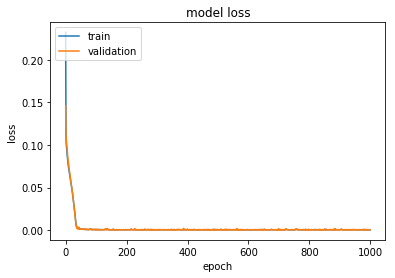

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# RNN/LSTM

In [9]:
# Data must be reshaped into 3D to be feed into the LSTM layer
ourdata = X.reshape((1, 1000, 5)) #reshaping the numpy array
label = y.reshape((1, 1000, 1))
input_shape = y.shape


In [10]:
input_shape

(1000, 1)

In [11]:
# define and Arch 
model = Sequential()
model.add(LSTM(32, input_shape=(1000, 5))) #50 is timesteps, 2 is the number of features we have
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear')) # Last layer is linear here 
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                396       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 52        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 5,317
Trainable params: 5,317
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(ourdata, label, epochs=100, verbose=1, validation_split=0.2)

ValueError: Error when checking target: expected dense_6 to have 2 dimensions, but got array with shape (1, 1000, 1)